# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [7]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

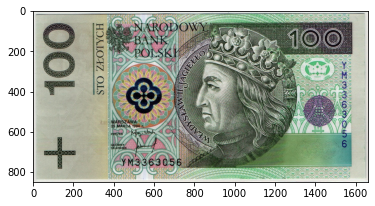

In [45]:
image_data = cv2.imread(fileName)
plt.imshow(image_data)

In [46]:
image_data

array([[[232, 235, 226],
        [232, 235, 226],
        [232, 234, 228],
        ...,
        [229, 230, 226],
        [231, 232, 228],
        [233, 232, 228]],

       [[233, 236, 227],
        [232, 235, 226],
        [232, 234, 228],
        ...,
        [230, 231, 227],
        [231, 232, 228],
        [233, 232, 228]],

       [[235, 236, 227],
        [233, 234, 225],
        [231, 233, 227],
        ...,
        [231, 232, 228],
        [231, 232, 228],
        [231, 232, 228]],

       ...,

       [[219, 223, 218],
        [219, 223, 218],
        [221, 225, 220],
        ...,
        [238, 244, 243],
        [241, 247, 246],
        [241, 247, 246]],

       [[232, 236, 231],
        [233, 237, 232],
        [234, 238, 233],
        ...,
        [245, 253, 252],
        [246, 254, 253],
        [245, 253, 252]],

       [[247, 252, 250],
        [249, 254, 252],
        [252, 255, 253],
        ...,
        [225, 236, 234],
        [223, 234, 232],
        [219, 230, 228]]

In [47]:
def bit_plane_scalling(image_data, bit):
      image_data = np.copy(image_data)
      for x, rows in enumerate(image_data):
        for y, values in enumerate(rows):
          for i, value in enumerate(values):
            if int('{0:08b}'.format(value)[7-bit]) == 1:
              image_data[x,y,i] = 2**bit
            else:
              image_data[x,y,i] = 0
      return image_data

In [48]:
bit_plane_scalling(image_data, 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 4],
        ...,
        [4, 4, 0],
        [4, 0, 4],
        [0, 0, 4]],

       [[0, 4, 0],
        [0, 0, 0],
        [0, 0, 4],
        ...,
        [4, 4, 0],
        [4, 0, 4],
        [0, 0, 4]],

       [[0, 4, 0],
        [0, 0, 0],
        [4, 0, 0],
        ...,
        [4, 0, 4],
        [4, 0, 4],
        [4, 0, 4]],

       ...,

       [[0, 4, 0],
        [0, 4, 0],
        [4, 0, 4],
        ...,
        [4, 4, 0],
        [0, 4, 4],
        [0, 4, 4]],

       [[0, 4, 4],
        [0, 4, 0],
        [0, 4, 0],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 0],
        [0, 4, 4],
        [4, 4, 4],
        ...,
        [0, 4, 0],
        [4, 0, 0],
        [0, 4, 4]]], dtype=uint8)

TypeError: ignored

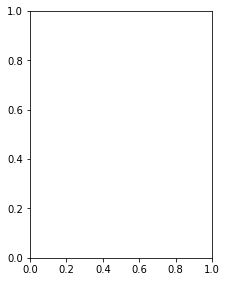

In [65]:
fig = plt.figure(figsize=(15, 10))
rows = 2
columns = 4
for x in range(0,8):
  fig.add_subplot(rows, columns, x+1)
  plt.imshow(bit_plane_scalling(image_data, x)*2**(7-x))

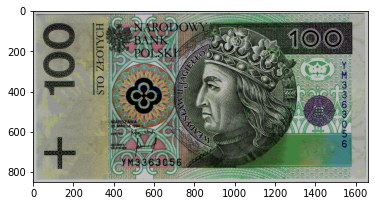

In [60]:
rec = bit_plane_scalling(image_data, 7) + bit_plane_scalling(image_data, 6)
plt.imshow(rec)

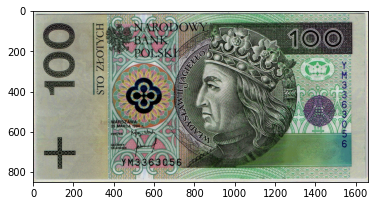

In [64]:
rec = bit_plane_scalling(image_data, 7) + bit_plane_scalling(image_data, 6) + bit_plane_scalling(image_data, 5)
plt.imshow(rec)

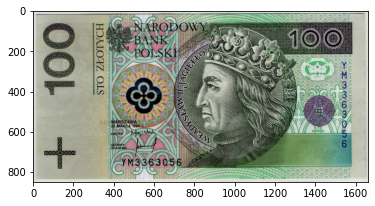

In [62]:
rec = bit_plane_scalling(image_data, 7) + bit_plane_scalling(image_data, 6) + bit_plane_scalling(image_data, 5) + bit_plane_scalling(image_data, 4)
plt.imshow(rec)